In the space available below, include your variable statistics and the Visualizations associated with them. These should show information that will be pertinent to your analysis. Do not choose random categories to analyze and visualize. Below the visualizations, describe what you see in the data and how it helps you understand your question.

Requirements:

- 1 pearson r correlation coefficient
- 1 t-test
- 1 ANOVA
- 1 visualization for each of the different tests.
- There should be at least 3 visualizations, and at least 3 different types of visualizations (e.g. scatter plot, bar chart, box plot, histogram, etc.)

In [117]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/martj42/international_results/master/results.csv"

df = pd.read_csv(url)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [118]:
print(df.columns.tolist())

['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral']


Is there a linear relationship between a team's goal difference in a match and the match outcome?

In [119]:
home = df[['date', 'home_team', 'away_team', 'home_score', 'away_score']].copy()
home = home.rename(columns={
    'home_team': 'team',
    'away_team': 'opponent',
    'home_score': 'goals_for',
    'away_score': 'goals_against'
})
home['is_home'] = True

away = df[['date', 'home_team', 'away_team', 'home_score', 'away_score']].copy()
away = away.rename(columns={
    'away_team': 'team',
    'home_team': 'opponent',
    'away_score': 'goals_for',
    'home_score': 'goals_against'
})
away['is_home'] = False

print(home.head())
print(away.head())

         date      team  opponent  goals_for  goals_against  is_home
0  1872-11-30  Scotland   England        0.0            0.0     True
1  1873-03-08   England  Scotland        4.0            2.0     True
2  1874-03-07  Scotland   England        2.0            1.0     True
3  1875-03-06   England  Scotland        2.0            2.0     True
4  1876-03-04  Scotland   England        3.0            0.0     True
         date  opponent      team  goals_against  goals_for  is_home
0  1872-11-30  Scotland   England            0.0        0.0    False
1  1873-03-08   England  Scotland            4.0        2.0    False
2  1874-03-07  Scotland   England            2.0        1.0    False
3  1875-03-06   England  Scotland            2.0        2.0    False
4  1876-03-04  Scotland   England            3.0        0.0    False


In [120]:
team_matches = pd.concat([home,away])
team_matches = team_matches.sort_values(by=['team', 'date']).reset_index(drop=True)
team_matches.head()

,date,team,opponent,goals_for,goals_against,is_home
0,2012-09-25,Abkhazia,Artsakh,1.0,1.0,True
1,2012-10-21,Abkhazia,Artsakh,0.0,3.0,False
2,2014-06-01,Abkhazia,Occitania,1.0,1.0,True
3,2014-06-02,Abkhazia,Sápmi,2.0,1.0,False
4,2014-06-04,Abkhazia,South Ossetia,0.0,0.0,True


In [121]:
team_matches['match_GD'] = team_matches['goals_for'] - team_matches['goals_against']
print(team_matches.head())

         date      team       opponent  goals_for  goals_against  is_home  \
0  2012-09-25  Abkhazia        Artsakh        1.0            1.0     True   
1  2012-10-21  Abkhazia        Artsakh        0.0            3.0    False   
2  2014-06-01  Abkhazia      Occitania        1.0            1.0     True   
3  2014-06-02  Abkhazia          Sápmi        2.0            1.0    False   
4  2014-06-04  Abkhazia  South Ossetia        0.0            0.0     True   

   match_GD  
0       0.0  
1      -3.0  
2       0.0  
3       1.0  
4       0.0  


In [122]:
def compute_points(row):
    if row['match_GD'] > 0:
        return 3
    elif row['match_GD'] < 0:
        return 0
    else:
        return 1

team_matches['points'] = team_matches.apply(compute_points, axis=1)
print(team_matches.head())

         date      team       opponent  goals_for  goals_against  is_home  \
0  2012-09-25  Abkhazia        Artsakh        1.0            1.0     True   
1  2012-10-21  Abkhazia        Artsakh        0.0            3.0    False   
2  2014-06-01  Abkhazia      Occitania        1.0            1.0     True   
3  2014-06-02  Abkhazia          Sápmi        2.0            1.0    False   
4  2014-06-04  Abkhazia  South Ossetia        0.0            0.0     True   

   match_GD  points  
0       0.0       1  
1      -3.0       0  
2       0.0       1  
3       1.0       3  
4       0.0       1  


In [ ]:
pre_GD_list = []


for team, group in team_matches.groupby("team"):
    group = group.sort_values("date")
    
    last_value = None
    for gd in group["match_GD"]:
        pre_GD_list.append(last_value)
        last_value = gd
        
team_matches['pre_match_GD'] = pre_GD_list
print(team_matches.head())

         date      team       opponent  goals_for  goals_against  is_home  \
0  2012-09-25  Abkhazia        Artsakh        1.0            1.0     True   
1  2012-10-21  Abkhazia        Artsakh        0.0            3.0    False   
2  2014-06-01  Abkhazia      Occitania        1.0            1.0     True   
3  2014-06-02  Abkhazia          Sápmi        2.0            1.0    False   
4  2014-06-04  Abkhazia  South Ossetia        0.0            0.0     True   

   match_GD  points  pre_match_GD  
0       0.0       1           NaN  
1      -3.0       0           0.0  
2       0.0       1          -3.0  
3       1.0       3           0.0  
4       0.0       1           1.0  


In [124]:
df_final = team_matches[["pre_match_GD", "points"]].dropna()

x = df_final["pre_match_GD"].tolist()
y = df_final["points"].tolist()

r, p = stats.pearsonr(x,y)
r_sq = r**2
print(f"r = {r:.4f}")
print(f"p-value = {p:.4f}")
print(f"x accounts for {r_sq*100:.2f}% of y movement")

r = 0.1563
p-value = 0.0000
x accounts for 2.44% of y movement


# The correlation between pre-match goal difference and match points earned was positive but weak r being 0.1563, and statistically significant p being 0.0000. This means that teams with a more favorable pre-match goal difference tend to earn slightly more points, but the effect is small. The r_sq shows that only 2.44% of the variation in match points can be explained by the pre-match goal difference

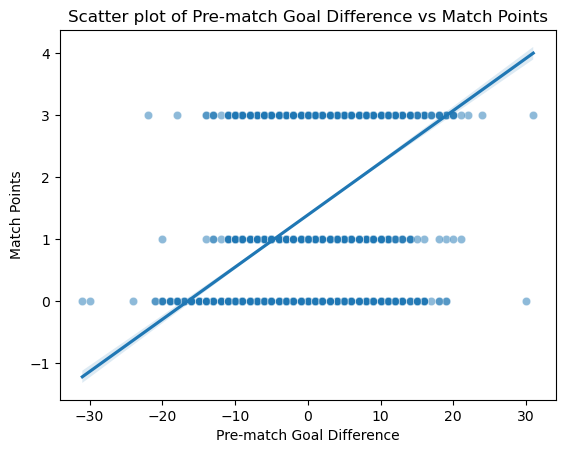

In [125]:
scat = sns.scatterplot(data=df_final, x="pre_match_GD", y="points", alpha=0.5)
sns.regplot(data=df_final, x="pre_match_GD", y="points", scatter=False, ax=scat)
plt.title("Scatter plot of Pre-match Goal Difference vs Match Points")
plt.xlabel("Pre-match Goal Difference")
plt.ylabel("Match Points")
plt.show()

# Do home teams score more than away teams?

In [126]:
df_clean = df.dropna(subset=["home_score", "away_score"])
home_goals = df_clean["home_score"]
away_goals = df_clean["away_score"]
print(home_goals)
print(away_goals)

0        0.0
1        4.0
2        2.0
3        2.0
4        3.0
        ... 
48844    0.0
48845    2.0
48846    1.0
48847    0.0
48848    0.0
Name: home_score, Length: 48849, dtype: float64
0        0.0
1        2.0
2        1.0
3        2.0
4        0.0
        ... 
48844    0.0
48845    6.0
48846    4.0
48847    0.0
48848    2.0
Name: away_score, Length: 48849, dtype: float64


In [127]:
t, p = stats.ttest_ind(home_goals, away_goals)
print(f't={t:.4f}, p={p:.4f}')

t=56.2654, p=0.0000


# This result shows a clear relashionship between playing at home and scoring more goals, with a t of 56.2654 and it is statistical significant because p is 0.0000, rejecting the null hypothesis

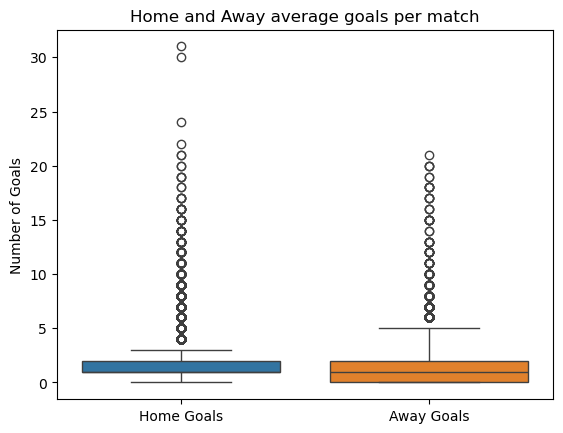

In [128]:
sns.boxplot(data=[home_goals, away_goals])
plt.xticks([0, 1], ['Home Goals', 'Away Goals'])
plt.title("Home and Away average goals per match")
plt.ylabel("Number of Goals")
plt.show()

# Has the average goals per match changed across different eras?

In [129]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["year"]

0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
48845    2025
48846    2025
48847    2025
48848    2025
48849    2025
Name: year, Length: 48850, dtype: int32

In [130]:
def get_era(year):
    if 1872 <= year <= 1949:
        return "Early Era (1872–1949)"
    elif 1950 <= year <= 1969:
        return "Goalkeeper Training & Catenaccio (1950–1969)"
    elif 1970 <= year <= 1985:
        return "Ball Tech & Total Football (1970–1985)"
    elif 1986 <= year <= 1997:
        return "Synthetic Balls & Modern Tactics (1986–1997)"
    elif 1998 <= year <= 2011:
        return "Foam Balls & Tactical Balance (1998–2011)"
    elif 2012 <= year <= 2017:
        return "Goal-Line Tech Era (2012–2017)"
    elif 2018 <= year <= 2021:
        return "VAR Era (2018–2021)"
    elif 2022 <= year <= 2025:
        return "Data & Semi-Automated Offside Era (2022–Present)"
    else:
        return "not defined"
    
df["era"] = df["year"].apply(get_era)
df["era"]

0                                   Early Era (1872–1949)
1                                   Early Era (1872–1949)
2                                   Early Era (1872–1949)
3                                   Early Era (1872–1949)
4                                   Early Era (1872–1949)
                               ...                       
48845    Data & Semi-Automated Offside Era (2022–Present)
48846    Data & Semi-Automated Offside Era (2022–Present)
48847    Data & Semi-Automated Offside Era (2022–Present)
48848    Data & Semi-Automated Offside Era (2022–Present)
48849    Data & Semi-Automated Offside Era (2022–Present)
Name: era, Length: 48850, dtype: object

In [131]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,era
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872,Early Era (1872–1949)
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873,Early Era (1872–1949)
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874,Early Era (1872–1949)
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875,Early Era (1872–1949)
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876,Early Era (1872–1949)


In [132]:
df["total_goals"] = df["home_score"] + df["away_score"]
df["total_goals"]

0        0.0
1        6.0
2        3.0
3        4.0
4        3.0
        ... 
48845    8.0
48846    5.0
48847    0.0
48848    2.0
48849    NaN
Name: total_goals, Length: 48850, dtype: float64

In [133]:
df_anova = df.dropna(subset=["total_goals", "era"])

In [134]:
eras = df_anova["era"].unique()
era_groups = [df_anova[df_anova["era"] == time]["total_goals"] for time in eras]
print(eras)
print(era_groups)

['Early Era (1872–1949)' 'Goalkeeper Training & Catenaccio (1950–1969)'
 'Ball Tech & Total Football (1970–1985)'
 'Synthetic Balls & Modern Tactics (1986–1997)'
 'Foam Balls & Tactical Balance (1998–2011)'
 'Goal-Line Tech Era (2012–2017)' 'VAR Era (2018–2021)'
 'Data & Semi-Automated Offside Era (2022–Present)']
[0       0.0
1       6.0
2       3.0
3       4.0
4       3.0
       ... 
3329    5.0
3330    1.0
3331    7.0
3332    2.0
3333    3.0
Name: total_goals, Length: 3334, dtype: float64, 3334    1.0
3335    2.0
3336    2.0
3337    5.0
3338    4.0
       ... 
7952    3.0
7953    2.0
7954    5.0
7955    4.0
7956    3.0
Name: total_goals, Length: 4623, dtype: float64, 7957     2.0
7958     0.0
7959     1.0
7960     2.0
7961     5.0
        ... 
15120    4.0
15121    4.0
15122    2.0
15123    1.0
15124    2.0
Name: total_goals, Length: 7168, dtype: float64, 15125    2.0
15126    1.0
15127    1.0
15128    2.0
15129    2.0
        ... 
22514    4.0
22515    3.0
22516    4.0
22517    2.0

In [135]:
f, p = stats.f_oneway(*era_groups)
print(f'ANOVA results: f = {f:.4f}, p = {p:.4f}')

ANOVA results: f = 329.4169, p = 0.0000


In [136]:
alpha = 0.05
dfb = len(era_groups) - 1
dfw = len(df_anova) - len(era_groups)
crit_f = stats.f.ppf(1-alpha, dfb, dfw)
print(f'f = {f:.4f}, critical f-value = {crit_f:.4}')

f = 329.4169, critical f-value = 2.01


# The analysis shows that total goals per match have significantly varied across different football eras, with a large F-statistic (329.42) indicating a strong effect of the era on scoring. This suggests that factors like changes in tactics, rules, and technology as stated have influenced goal-scoring trends over time.

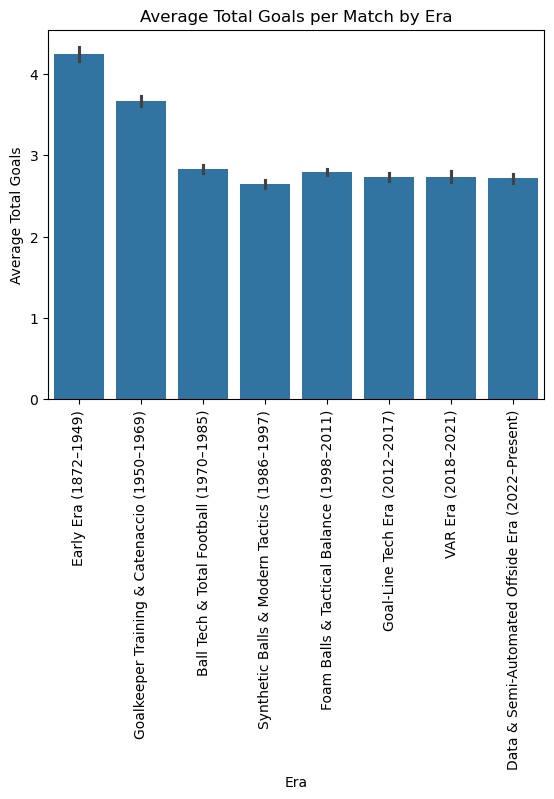

In [137]:
sns.barplot(x='era', y='total_goals', data=df_anova)
plt.xticks(rotation=90)
plt.title("Average Total Goals per Match by Era")
plt.ylabel("Average Total Goals")
plt.xlabel("Era")
plt.show()